In [2]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random
from random import randint

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
np.random.seed(42)

# Load Data

In [3]:
df = pd.read_csv('PitcherData.csv')

In [4]:
df.dropna(inplace=True)
df

,px,pz,end_speed,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pitch_type_code,year,inning,p_score,type_B,type_S,type_X,stand_L,stand_R
0,-1.598000,1.869000,82.8,1.0,0.0,2015000632,0.0,0.0,0.0,1.0,0.0,0.0,0.0,FB,2015,1,0,0,1,0,1,0
1,-0.909000,2.487000,85.0,1.0,0.0,2015000632,0.0,1.0,0.0,2.0,0.0,0.0,0.0,FB,2015,1,0,0,1,0,1,0
2,-1.585000,2.934000,86.6,1.0,0.0,2015000632,0.0,2.0,0.0,3.0,0.0,0.0,0.0,FB,2015,1,0,1,0,0,1,0
3,0.364000,0.245000,79.9,3.0,0.0,2015000632,1.0,2.0,0.0,4.0,0.0,0.0,0.0,OS,2015,1,0,1,0,0,1,0
4,-1.927000,4.250000,85.7,1.0,0.0,2015000632,2.0,2.0,0.0,5.0,0.0,0.0,0.0,FB,2015,1,0,1,0,0,1,0
5,-0.796000,2.408000,79.9,3.0,0.0,2015000632,3.0,2.0,0.0,6.0,0.0,0.0,0.0,OS,2015,1,0,0,1,0,1,0
6,0.001000,2.783000,85.9,1.0,0.0,2015000632,3.0,2.0,0.0,7.0,0.0,0.0,0.0,FB,2015,1,0,0,1,0,1,0
7,-1.397000,3.204000,85.3,1.0,0.0,2015000632,3.0,2.0,0.0,8.0,0.0,0.0,0.0,FB,2015,1,0,1,0,0,1,0
8,0.861000,2.996000,83.5,1.0,0.0,2015000633,0.0,0.0,0.0,1.0,1.0,0.0,0.0,FB,2015,1,0,1,0,0,0,1
9,-0.360000,2.826000,85.3,1.0,0.0,2015000633,1.0,0.0,0.0,2.0,1.0,0.0,0.0,FB,2015,1,0,0,1,0,0,1


In [5]:
df.drop(columns=['px','pz','end_speed','stand_R','pitch_num'], inplace=True)

In [6]:
print(df)

       pitch_type  b_score       ab_id  b_count  s_count  outs  on_1b  on_2b  \
0             1.0      0.0  2015000632      0.0      0.0   0.0    0.0    0.0   
1             1.0      0.0  2015000632      0.0      1.0   0.0    0.0    0.0   
2             1.0      0.0  2015000632      0.0      2.0   0.0    0.0    0.0   
3             3.0      0.0  2015000632      1.0      2.0   0.0    0.0    0.0   
4             1.0      0.0  2015000632      2.0      2.0   0.0    0.0    0.0   
5             3.0      0.0  2015000632      3.0      2.0   0.0    0.0    0.0   
6             1.0      0.0  2015000632      3.0      2.0   0.0    0.0    0.0   
7             1.0      0.0  2015000632      3.0      2.0   0.0    0.0    0.0   
8             1.0      0.0  2015000633      0.0      0.0   0.0    1.0    0.0   
9             1.0      0.0  2015000633      1.0      0.0   0.0    1.0    0.0   
10            2.0      0.0  2015000633      1.0      1.0   0.0    1.0    0.0   
11            2.0      0.0  2015000633  

## Break up data into X and y

In [5]:
def dataFrameBreakUp(df1):
    y_pitchletter = df1['pitch_type_code']
    y_pitchcode = df1['pitch_type']
    outputdf = df1.drop(columns=['pitch_type_code','pitch_type'])
    return outputdf, y_pitchletter, y_pitchcode

In [6]:
X, y1, y = dataFrameBreakUp(df) 

In [7]:
X = X.drop(columns=['year','ab_id'])
X

,b_score,b_count,s_count,outs,on_1b,on_2b,on_3b,inning,p_score,type_B,type_S,type_X,stand_L
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1
5,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1
6,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1
7,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,0,0,0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0


## Split Data into Train and Test sets

In [8]:
X_train, X_test, y1_train, y1_test, y_train, y_test = train_test_split(X, y1, y, test_size = 0.2)
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y_train.shape, y_test.shape

((10783, 13), (2696, 13), (10783,), (2696,), (10783,), (2696,))

## Default XGBoost Classifier

In [9]:
#number of classes
no_class = len(np.unique(y1_train))
no_class

3

In [10]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()

In [11]:
%%time
xgbc.fit(X_train,y1_train)

Wall time: 1.39 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [12]:
#classification report for training data
y_hat = xgbc.predict(X_train)
print(classification_report(y1_train, y_hat))

              precision    recall  f1-score   support

          BR       0.52      0.18      0.27      2984
          FB       0.61      0.94      0.74      6302
          OS       0.52      0.01      0.01      1497

   micro avg       0.60      0.60      0.60     10783
   macro avg       0.55      0.38      0.34     10783
weighted avg       0.57      0.60      0.51     10783



In [13]:
#classification report for test data
y_hat = xgbc.predict(X_test)
print(classification_report(y1_test,y_hat))

              precision    recall  f1-score   support

          BR       0.43      0.13      0.20       745
          FB       0.60      0.94      0.73      1592
          OS       0.67      0.01      0.01       359

   micro avg       0.59      0.59      0.59      2696
   macro avg       0.57      0.36      0.32      2696
weighted avg       0.56      0.59      0.49      2696



In [14]:
#feature importance
fi = np.array(xgbc.feature_importances_)
Xcols=np.array(X_train.columns)
fidf = pd.DataFrame(data=np.vstack((Xcols,fi)).T, columns=['features','importance'])
plotdf = fidf.sort_values(by=['importance'],ascending=False)
plotdf

,features,importance
12,stand_L,0.439225
2,s_count,0.108532
10,type_S,0.0693984
9,type_B,0.0634256
7,inning,0.0579943
1,b_count,0.0557226
5,on_2b,0.0548104
11,type_X,0.0357548
4,on_1b,0.0267287
8,p_score,0.0249329


## Hyperparameter Tuning

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [15]:
from sklearn.model_selection import GridSearchCV

estlist = np.arange(1,101)
depthlist = np.arange(1,21)

p_grid = [{'n_estimators': estlist}, 
          {'max_depth' : depthlist}]
#use all possible threads
grid_search_XGB = GridSearchCV(xgbc, param_grid=p_grid, scoring='accuracy')

In [16]:
%%time
grid_search_XGB.fit(X_train,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 6min 10s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': array([  1,   2, ...,  99, 100])}, {'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
#best estimator
grid_search_XGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=52, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [18]:
#classification report for best result for training data
y_hat = grid_search_XGB.predict(X_train)
print(classification_report(y1_train,y_hat))

              precision    recall  f1-score   support

          BR       0.51      0.16      0.24      2984
          FB       0.61      0.95      0.74      6302
          OS       0.00      0.00      0.00      1497

   micro avg       0.60      0.60      0.60     10783
   macro avg       0.37      0.37      0.33     10783
weighted avg       0.50      0.60      0.50     10783



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
#classification report for best result for test data
y_hat_test = grid_search_XGB.predict(X_test)
print(classification_report(y1_test,y_hat_test))

              precision    recall  f1-score   support

          BR       0.42      0.12      0.19       745
          FB       0.60      0.94      0.74      1592
          OS       0.00      0.00      0.00       359

   micro avg       0.59      0.59      0.59      2696
   macro avg       0.34      0.35      0.31      2696
weighted avg       0.47      0.59      0.49      2696



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
pitchprob = grid_search_XGB.predict_proba(X_test)
pitchclass = grid_search_XGB.classes_

Index: 1931
Actual: BR
Predicted: BR


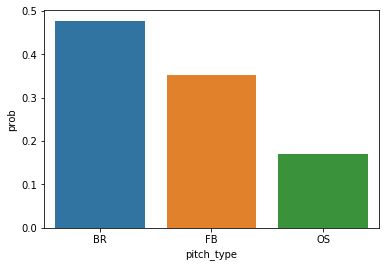

In [25]:
#pick a random row from the test set, and compare the prediction with the actual pitch result
#plot a distribution histogram for each pitch type
index = randint(0,len(pitchprob))
pitchprobdf = pd.DataFrame(data=pitchclass, columns=['pitch_type'])
pitchprobdf['prob'] = pitchprob[index]
print('Index:', index)
print("Actual:", np.array(y1_test)[index])
print("Predicted:", np.array(y_hat_test)[index])
myplt=sns.barplot(x="pitch_type", y="prob", data=pitchprobdf)